In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['orders.csv', 'departments.csv', 'products.csv', 'order_products__train.csv', 'order_products__prior.csv', 'aisles.csv']


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import glob
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()

'/kaggle/working'

In [4]:
os.chdir("../input")

In [5]:
os.listdir()

['orders.csv',
 'departments.csv',
 'products.csv',
 'order_products__train.csv',
 'order_products__prior.csv',
 'aisles.csv']

In [6]:
#Finding the list of files to uplod
pattern = '*.csv'
csv_files = glob.glob(pattern)
print(csv_files)

['orders.csv', 'departments.csv', 'products.csv', 'order_products__train.csv', 'order_products__prior.csv', 'aisles.csv']


In [7]:
#uploading files
aisles = pd.read_csv("aisles.csv", dtype={'aisle_id': 'object'})
departments = pd.read_csv("departments.csv", dtype={'department_id':'object'})
orders = pd.read_csv("orders.csv", dtype = {'order_number': 'uint32',
                                            'order_dow': 'uint32',
                                            'order_hour_of_day': 'uint32',
                                            'days_since_prior_order': 'float16',
                                            'order_id': 'object',
                                            'user_id': 'object'})
orders_products_prior = pd.read_csv("order_products__prior.csv", dtype={'add_to_cart_order':'uint32',
                                                                        'reordered': 'uint32',
                                                                        'order_id': 'object', 
                                                                        'product_id': 'object'})
orders_products_train = pd.read_csv("order_products__train.csv", dtype={'add_to_cart_order':'uint32',
                                                                        'reordered': 'uint32',
                                                                        'order_id': 'object', 
                                                                        'product_id': 'object'})
products = pd.read_csv("products.csv", dtype={'product_id': 'object',
                                              'aisle_id': 'object', 
                                              'department_id': 'object'})

In [8]:
orders.dtypes

order_id                   object
user_id                    object
eval_set                   object
order_number               uint32
order_dow                  uint32
order_hour_of_day          uint32
days_since_prior_order    float16
dtype: object

In [9]:
# Assigining names to the datasets
data_list = [aisles, departments, orders, orders_products_prior, orders_products_train, products]
data_list_name = ['aisles', 'departments', 'orders', 'orders_products_prior', 'orders_products_train', 'products']

In [10]:
j=0
for i in data_list:
    i.name = data_list_name[j]
    j += 1

In [11]:
def null_columns(x):
    y = x.columns[x.isnull().any()]
    return y

for dataset in data_list:
    if len(null_columns(dataset)) == 0:
        print('Dataset ' + dataset.name + ' has no null values ')
    else:
        print('Dataset '+ dataset.name + ' has null values in column '+ str([i for i in null_columns(dataset)]))

Dataset aisles has no null values 
Dataset departments has no null values 
Dataset orders has null values in column ['days_since_prior_order']
Dataset orders_products_prior has no null values 
Dataset orders_products_train has no null values 
Dataset products has no null values 


In [12]:
#Dataset orders has null values in column ['days_since_prior_order'] 
#Finding the number of null values in orders.days_since_prior_order

sum(orders.days_since_prior_order.isnull())

#There are 206209 null values
#Lets examine the null values
orders.loc[orders.days_since_prior_order.isnull()==True,['user_id', 'order_number']]

,user_id,order_number
0,1,1
11,2,1
26,3,1
39,4,1
45,5,1
50,6,1
54,7,1
75,8,1
79,9,1
83,10,1


In [13]:
#days_since_prior_order attribue for first order for all the users is null so it can be changed to 0

orders.days_since_prior_order = orders.days_since_prior_order.fillna(int(0))

In [14]:
# Merging Orders and orders_products_prior
total = orders.merge(orders_products_prior, how = 'left', on='order_id').merge(orders_products_train,
                                                                              how='left', on ='order_id')

In [15]:
total.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y
0,2539329,1,prior,1,2,8,0.0,196,1.0,0.0,NaN,NaN,NaN
1,2539329,1,prior,1,2,8,0.0,14084,2.0,0.0,NaN,NaN,NaN
2,2539329,1,prior,1,2,8,0.0,12427,3.0,0.0,NaN,NaN,NaN
3,2539329,1,prior,1,2,8,0.0,26088,4.0,0.0,NaN,NaN,NaN
4,2539329,1,prior,1,2,8,0.0,26405,5.0,0.0,NaN,NaN,NaN


In [16]:
#for i in ('product_id', 'add_to_cart_order', 'reordered'):
total.product_id_x = total.product_id_x.fillna(total.product_id_y)
total.add_to_cart_order_x = total.add_to_cart_order_x.fillna(total.add_to_cart_order_y)
total.reordered_x = total.reordered_x.fillna(total.reordered_y)

In [17]:
#Dropping the duplicate columns
total = total.drop(['product_id_y', 'add_to_cart_order_y', 'reordered_y'], axis=1)

In [18]:
total.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_x,add_to_cart_order_x,reordered_x
0,2539329,1,prior,1,2,8,0.0,196,1.0,0.0
1,2539329,1,prior,1,2,8,0.0,14084,2.0,0.0
2,2539329,1,prior,1,2,8,0.0,12427,3.0,0.0
3,2539329,1,prior,1,2,8,0.0,26088,4.0,0.0
4,2539329,1,prior,1,2,8,0.0,26405,5.0,0.0


In [19]:
#Renaming the columns after merging
total=total.rename(columns = {'product_id_x':'product_id',
                             'add_to_cart_order_x': 'add_to_cart_order',
                             'reordered_x': 'reordered'})

In [20]:
total.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196,1.0,0.0
1,2539329,1,prior,1,2,8,0.0,14084,2.0,0.0
2,2539329,1,prior,1,2,8,0.0,12427,3.0,0.0
3,2539329,1,prior,1,2,8,0.0,26088,4.0,0.0
4,2539329,1,prior,1,2,8,0.0,26405,5.0,0.0


In [21]:
total.dtypes

order_id                   object
user_id                    object
eval_set                   object
order_number               uint32
order_dow                  uint32
order_hour_of_day          uint32
days_since_prior_order    float16
product_id                 object
add_to_cart_order         float64
reordered                 float64
dtype: object

In [22]:
#Changing the data type of 'add_to_cart_order','reordered' to float16 to improve performance
total[['add_to_cart_order','reordered']] = total[['add_to_cart_order','reordered']].astype('float16')

In [23]:
total.dtypes

order_id                   object
user_id                    object
eval_set                   object
order_number               uint32
order_dow                  uint32
order_hour_of_day          uint32
days_since_prior_order    float16
product_id                 object
add_to_cart_order         float16
reordered                 float16
dtype: object

In [24]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [25]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [26]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [27]:
#Merging total with products dataframe as total1 
total1 = total.merge(products, on='product_id', how = 'left')

In [28]:
#Merging total1 and aisles
total1 = total1.merge(aisles, on='aisle_id', how = 'left')

In [29]:
#Merging total1 and departments
total1 = total1.merge(departments, on='department_id', how = 'left')

In [30]:
os.getcwd()

'/kaggle/input'

In [31]:
#total1.to_csv("/kaggle/total1.csv", index=None)

In [32]:
total1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,0.0,196,1.0,0.0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,0.0,14084,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,0.0,12427,3.0,0.0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,0.0,26088,4.0,0.0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,0.0,26405,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [33]:
total1.shape

(33894106, 15)

In [34]:
total1.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')

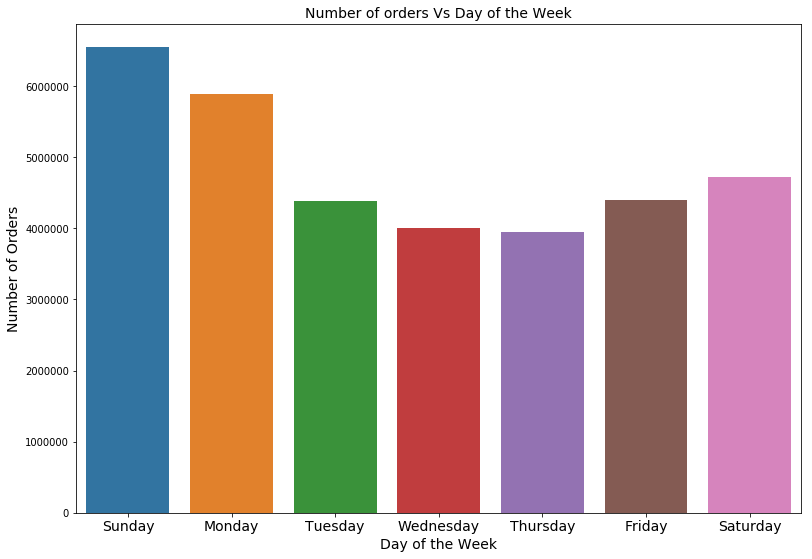

In [35]:
#Number of orders per day of the week
plt.figure(figsize=(13,9))
sns.countplot(x='order_dow', data=total1, )
ax = plt.gca()
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday'])
plt.xticks(fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Number of orders Vs Day of the Week', fontsize=14)
plt.show()

**Number of orders Vs Day of the Week**

-Number of orders are high on Sunday, which gradually decresed till Thursday and again increases towards friday and saturday.


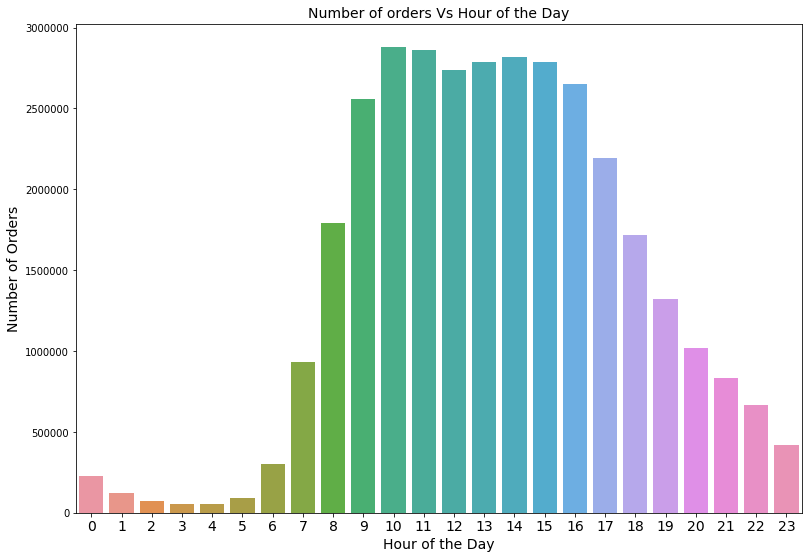

In [36]:
#Number of orders per hour of the day
plt.figure(figsize=(13,9))
sns.countplot(x='order_hour_of_day', data=total1)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(fontsize=14)
plt.title('Number of orders Vs Hour of the Day', fontsize=14)
plt.show()

**Number of orders Vs Hour of the Day**

-Number of orders increased from 6 AM until 10 Am and stayed high until 4PM and gradually decreased towards the night.

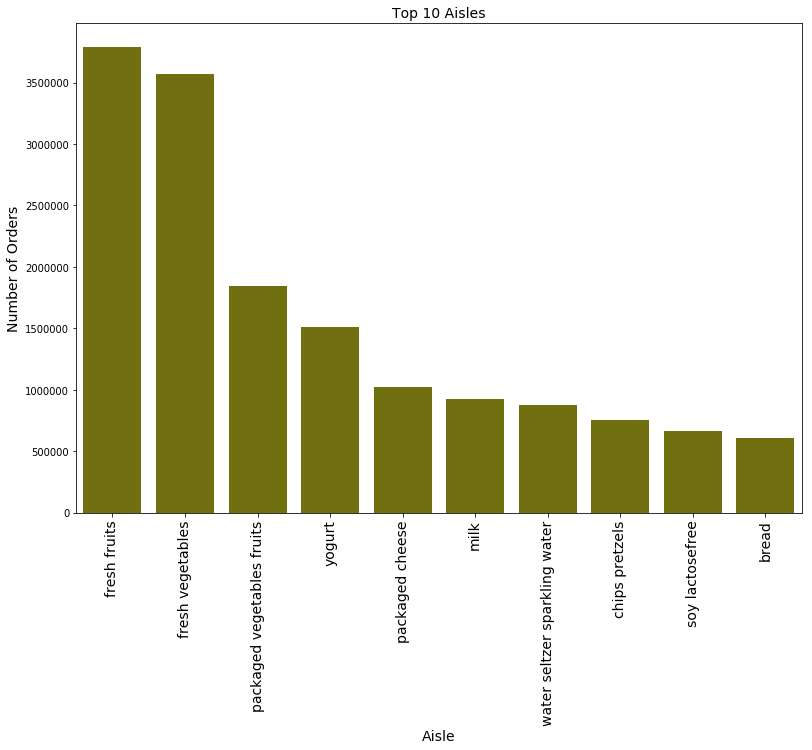

In [37]:
#Top 10 Aisles
aisle_top10 = pd.DataFrame(total1.groupby('aisle').aisle.count().sort_values(ascending=False).head(10))
plt.figure(figsize=(13,9))
sns.barplot(aisle_top10.index, aisle_top10.aisle, color='olive').set_title('Top 10 Aisles', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Aisle', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

**Top 10 Aisles**

-'Fresh fruits' is the top Aisle with hightest orders followed by  'Fresh vegetables' and 'packeged vegetables fruits'.

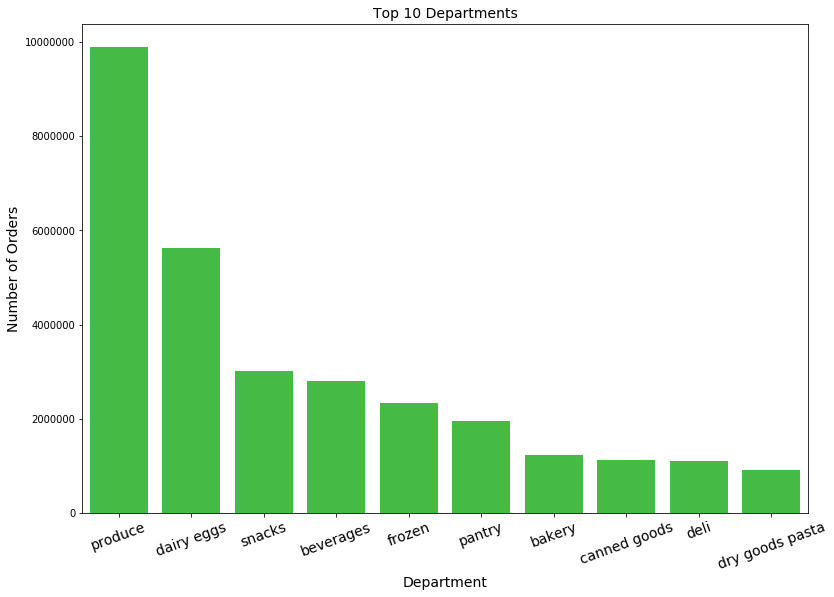

In [38]:
#Top 10 Departments
departments_top10 = pd.DataFrame(total1.groupby('department').department.count().sort_values(ascending=False).head(10))
plt.figure(figsize=(13,9))
sns.barplot(departments_top10.index, departments_top10.department, color='limegreen').set_title('Top 10 Departments', fontsize=14)
plt.xticks(fontsize=14, rotation=20)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

**Top 10 Departments**

-Produce is the top department with highest number of sales followed by dairy eggs and snacks.

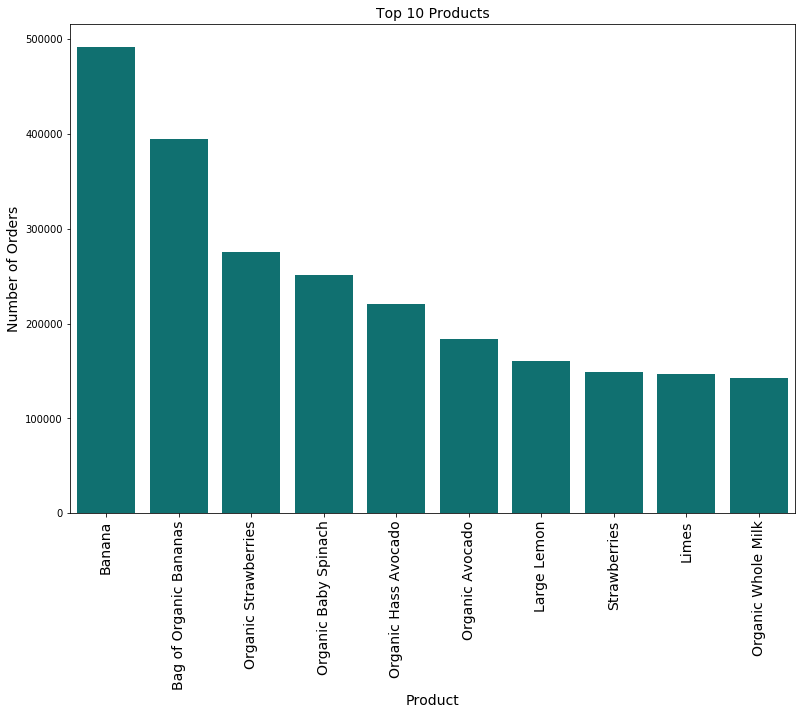

In [39]:
#Top 10 Products
products_top10 = pd.DataFrame(total1.groupby('product_name').product_name.count().sort_values(ascending=False).head(10))
plt.figure(figsize=(13,9))
sns.barplot(products_top10.index, products_top10.product_name, color='teal').set_title('Top 10 Products', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

**Top 10 Products**

-'Banana' is the top product with highest number of orders followed by bag of organic bananas and organic strawberries.

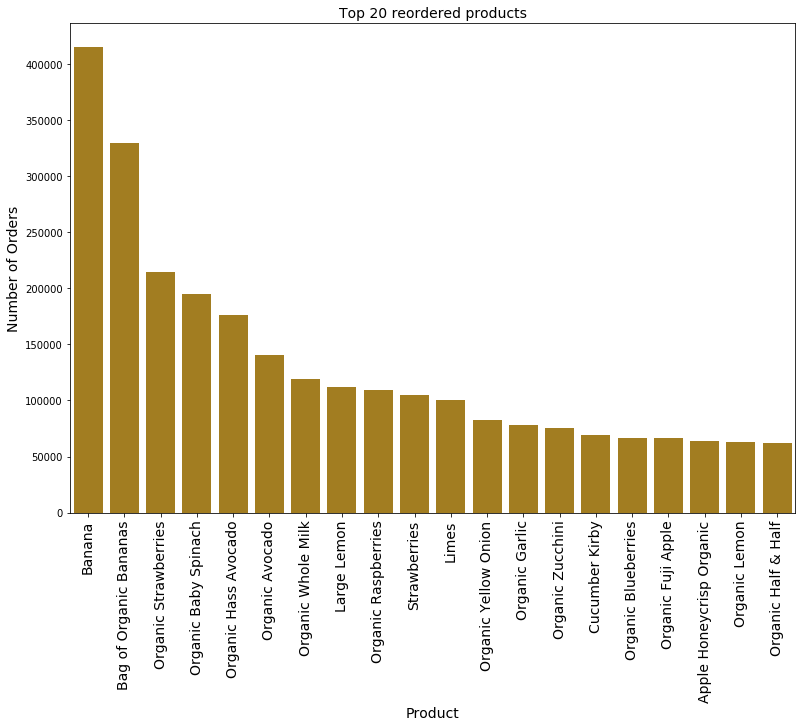

In [40]:
#Top 20 reordered Products
reordered = pd.DataFrame(total1.loc[total1['reordered']==1.0].groupby('product_name').size().sort_values(ascending=False).head(20).reset_index(name='counts'))
plt.figure(figsize=(13,9))
sns.barplot(reordered.product_name, reordered.counts, color='darkgoldenrod')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Top 20 reordered products', fontsize=14)
plt.show()

**Top 20 reordered products**

-'Banana' is the top reordered product with highest number of orders followed by bag of organic bananas and organic strawberries.

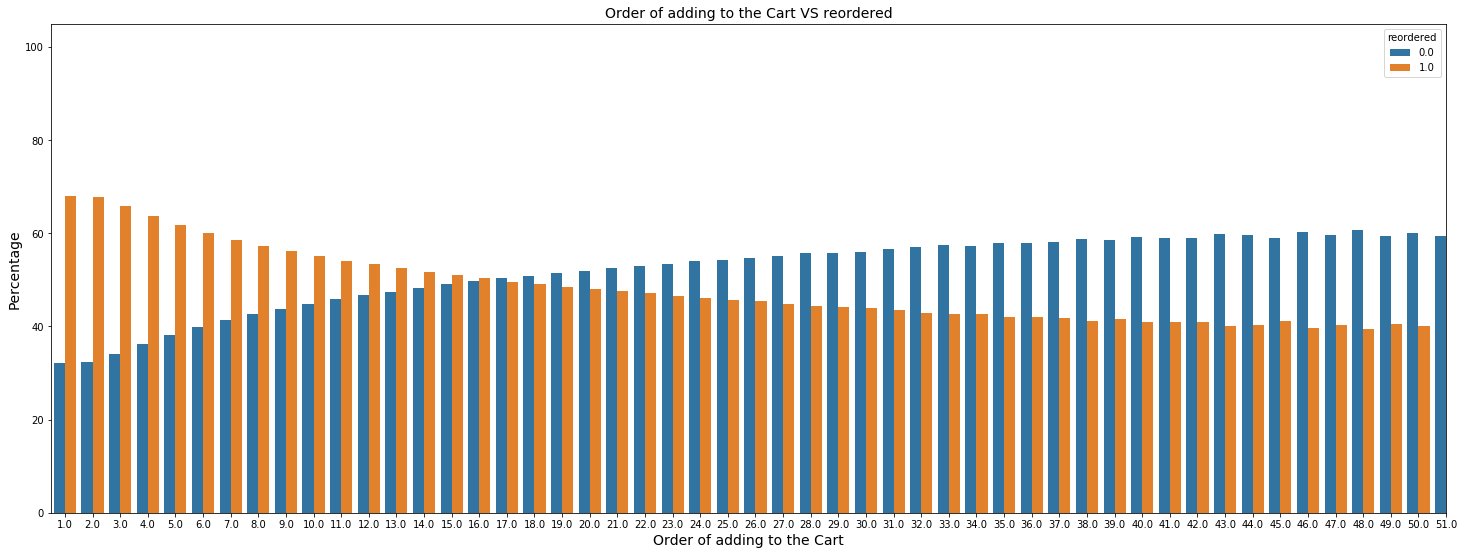

In [41]:
#Added to the Cart sequence Vs reordered
df2 = total1.groupby(['add_to_cart_order', 'reordered']).size().to_frame('Counts')
df = df2.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(25,9))
sns.barplot(df.add_to_cart_order, df.Counts, hue=df.reordered)
plt.xlim(xmax=50)
plt.xlabel('Order of adding to the Cart', fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Order of adding to the Cart VS reordered',fontsize=14)
plt.show()

**Order of adding to the Cart VS reordered**

-There is a clear pattern that items that were added to the cart first are reordered most.
-The pattern continued until item 16 and after that the reorder percentage gradually decreased.

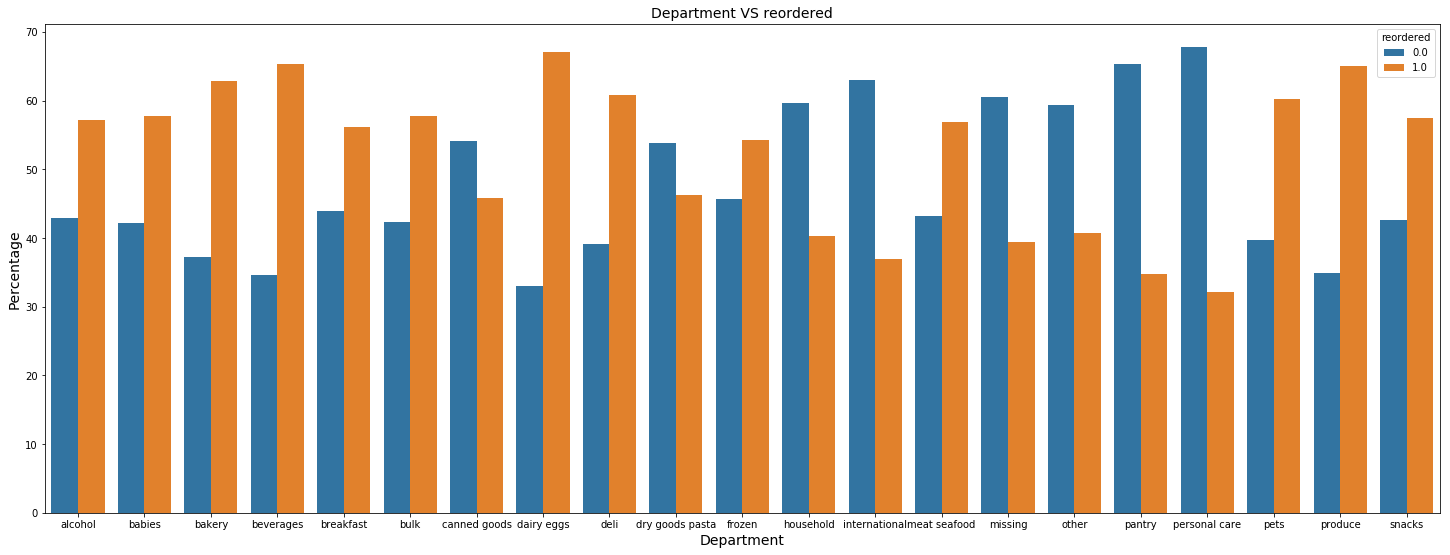

In [42]:
#Department Vs Reordered
dep_reord = total1.groupby(['department', 'reordered']).size().to_frame('Counts')
dep_reord1 = dep_reord.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(25,9))
sns.barplot(dep_reord1.department, dep_reord1.Counts, hue=dep_reord1.reordered)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Department VS reordered',fontsize=14)
plt.show()

**Department VS reordered**

-'Dairy eggs' is the department with highest reordered rate followed by 'produce' and 'beverages'. 

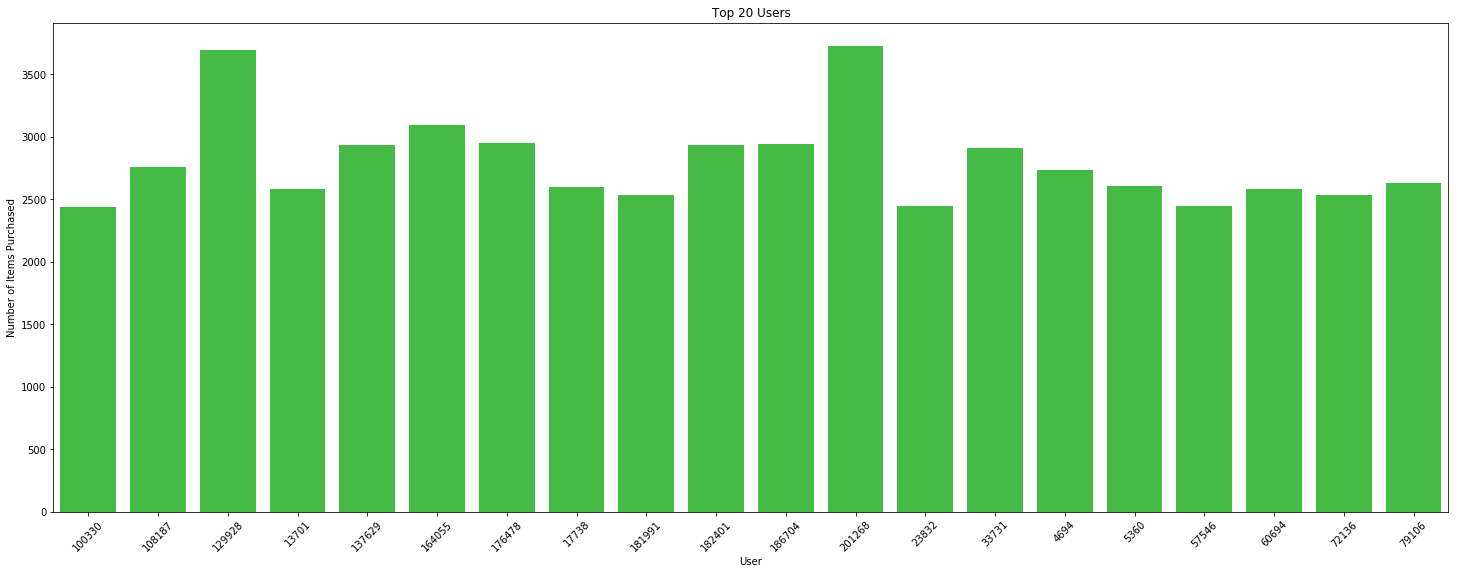

In [43]:
#Top 20 Users
top_20_users = total1.groupby('user_id').size().sort_values(ascending=False).to_frame('Counts').head(20)
plt.figure(figsize=(25,9))
sns.barplot(top_20_users.index,top_20_users.Counts, color='limegreen')
plt.xticks(rotation=45)
plt.xlabel('User')
plt.ylabel('Number of Items Purchased')
plt.title('Top 20 Users')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


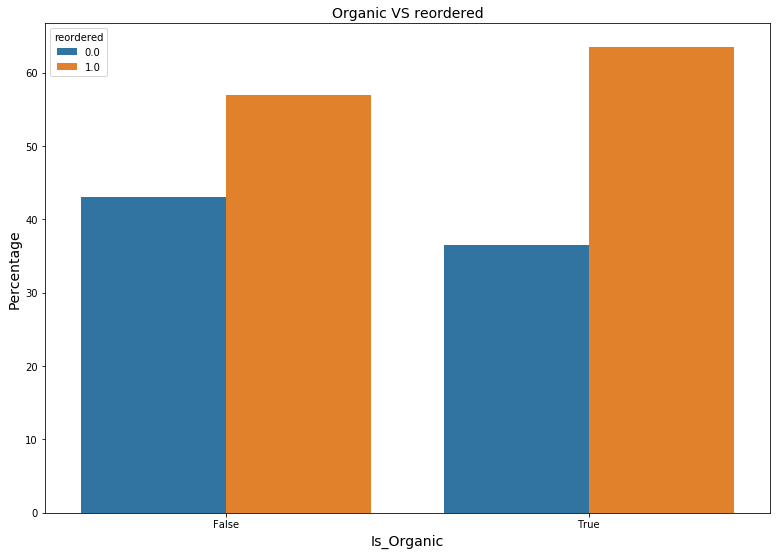

In [44]:
#Organic VS reordered
df4 = total1[['product_name','reordered']]
df4['is_organic'] = df4['product_name'].str.contains('Organic')
organic2 = df4.groupby(['is_organic','reordered']).size().to_frame('Counts')
organic3 = organic2.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(13,9))
sns.barplot(organic3.is_organic, organic3.Counts, hue=organic3.reordered)
plt.xlabel('Is_Organic', fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Organic VS reordered',fontsize=14)
plt.show()

In [46]:
#Avg add_to_cart for each product
Avg_order = total1.groupby(['product_name'])['add_to_cart_order'].aggregate('mean').to_frame('Avg_add_to_cart')
Avg_order['Avg_add_to_cart'] = Avg_order['Avg_add_to_cart'].apply(lambda x: round(x,2))

In [47]:
Avg_order.sort_values(by='Avg_add_to_cart')

,Avg_add_to_cart
product_name,
Indian Wells Merlot,1.00
Vegan Coconut Milk Caramels With Sea Salt,1.00
Prenatal Nutrients,1.00
American Blend,1.00
Easter Basket,1.00
"Flax Oil, Organic, Omega-3, Original Formula",1.00
Peppermint Schnapps Liqueur,1.00
Rosa Mosqueta Rose Hip Seed Oil,1.00
Pappardelle Nests Pasta,1.00


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


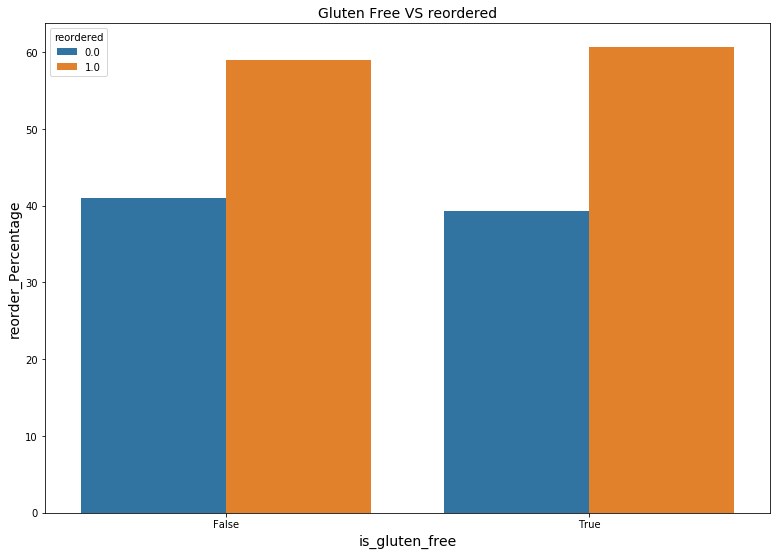

In [48]:
#Gluten free VS reordered
df5 = total1[['product_name','reordered']]
df5['is_gluten_free'] = df4['product_name'].str.contains('gluten' and 'free')
gluten_free = df5.groupby(['is_gluten_free','reordered']).size().to_frame('Counts')
gluten_free1 = gluten_free.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(13,9))
sns.barplot(gluten_free1.is_gluten_free, gluten_free1.Counts, hue=gluten_free1.reordered)
plt.xlabel('is_gluten_free', fontsize=14)
plt.ylabel('reorder_Percentage',fontsize=14)
plt.title('Gluten Free VS reordered',fontsize=14)
plt.show()

Reorder rate in gluten free items is greater than other items

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


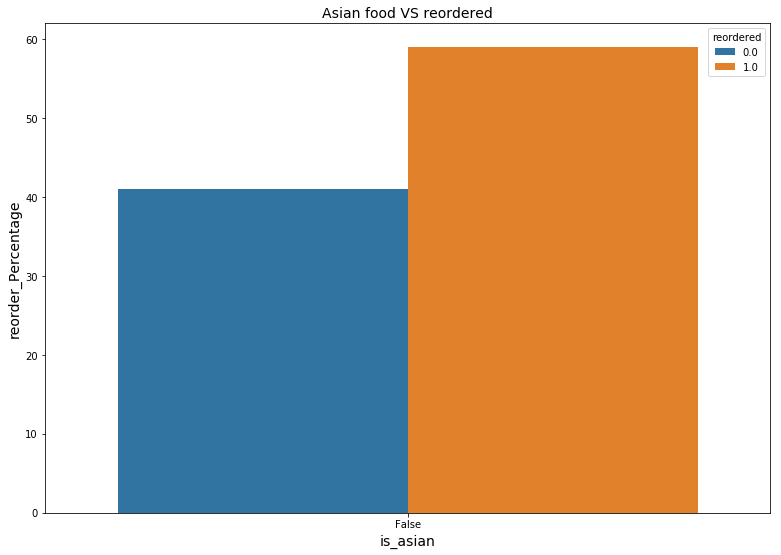

In [49]:
#Asian VS reordered
df6 = total1[['product_name','reordered']]
df6['is_asian'] = df4['product_name'].str.contains('asian')
asian = df6.groupby(['is_asian','reordered']).size().to_frame('Counts')
asian1 = asian.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(13,9))
sns.barplot(asian1.is_asian, asian1.Counts, hue=asian1.reordered)
plt.xlabel('is_asian', fontsize=14)
plt.ylabel('reorder_Percentage',fontsize=14)
plt.title('Asian food VS reordered',fontsize=14)
plt.show()

There is no product with asian in the name

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


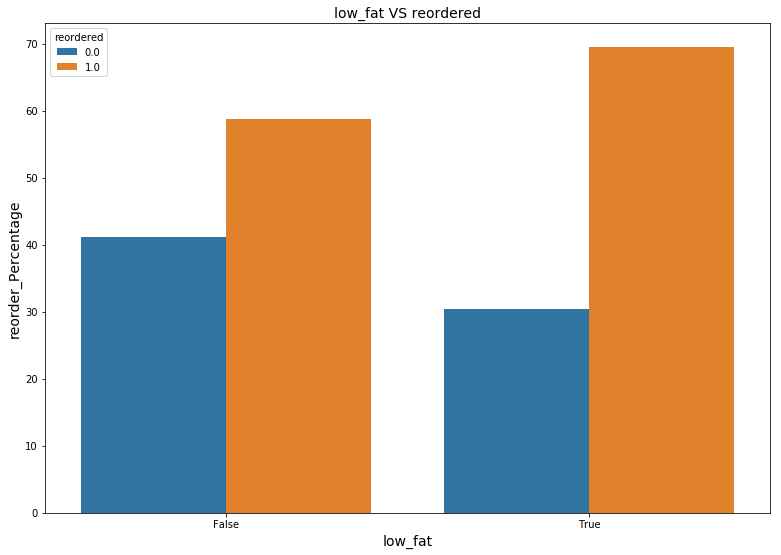

In [50]:
#Low fat VS reordered
df11 = total1[['product_name','reordered']]
df11['low_fat'] = df4['product_name'].str.contains('low' and 'fat')
low_fat = df11.groupby(['low_fat','reordered']).size().to_frame('Counts')
low_fat1 = low_fat.groupby(level=[0]).apply(lambda x: round(x / x.sum()*100,2)).reset_index()
plt.figure(figsize=(13,9))
sns.barplot(low_fat1.low_fat, low_fat1.Counts, low_fat1.reordered)
plt.xlabel('low_fat', fontsize=14)
plt.ylabel('reorder_Percentage',fontsize=14)
plt.title('low_fat VS reordered',fontsize=14)
plt.show()

Products with low_fat tag were reordered more than other items

In [51]:
def timezone(i):
    if i < 3:
        return 'midnight'
    elif i < 6:
        return 'early morning'
    elif i < 12:
        return 'morning'
    elif i < 18:
        return 'noon'
    else:
        return 'night'
    

In [ ]:
df7 = total1[['department', 'order_hour_of_day']]
df7['time_zone'] = df7.order_hour_of_day.map(timezone)
time_zone = df7.groupby(['department', 'time_zone']).size().to_frame('Counts')
timezone1 = time_zone['Counts'].groupby(level=0, group_keys=False)
timezone2 = timezone1.apply(lambda x: x.sort_values(ascending=False).head(1)).to_frame('Counts')
#timezone2 = timezone2.reset_index()

In [ ]:
timezone2

All the depaetments have highest number of orders in 'Noon'

In [ ]:
total1.head(10).T